# Linear Regression

Importing data

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

* импорт необходимых библиотек для дальйнейшей работы

In [2]:
# Importing the dataset
df = pd.read_csv('invest_prep.csv', sep=';')
df.head(20)

,country,is_urban,age,female,married,religion,education_level,can_calc_percents,employment_type_last_year,income_government_last_year,income_own_business_last_year,num_times_borrowed_last_year,active_bank_user,cash_property_savings,has_insurance,can_call,can_make_transaction,phone_ownership,has_investment,formal_savings (Y)
0,0,False,57,True,True,1,3.0,True,0,True,False,1,False,False,False,True,True,2,False,False
1,1,False,40,False,True,2,0.0,False,0,False,False,1,False,False,False,False,False,2,False,True
2,2,False,35,True,True,0,1.0,False,1,False,False,1,False,True,False,True,False,2,False,False
3,2,True,19,True,False,0,3.0,False,0,False,False,0,False,False,False,True,False,1,False,False
4,3,False,61,True,True,0,0.0,False,1,False,False,1,False,False,False,False,False,1,False,False
5,3,True,16,True,False,0,2.0,False,1,True,False,1,False,False,False,True,True,1,False,False
6,0,False,40,False,True,0,0.0,False,2,False,False,0,False,True,False,False,False,0,True,False
7,1,False,27,True,True,2,0.0,False,1,False,False,0,False,False,False,False,False,0,False,True
8,3,True,35,False,True,0,3.0,True,0,False,False,0,True,True,False,True,True,2,True,True
9,4,False,72,True,False,1,1.0,False,2,False,False,2,False,False,False,False,False,2,False,True


* загрузка подготовленного раннее датасета.

In [3]:
df.shape

(8400, 20)

* датасет содержит 8400 наблюдений и 20 переменных (поскольку наиболее коррелируемые были удалены из модели)

# Correlations

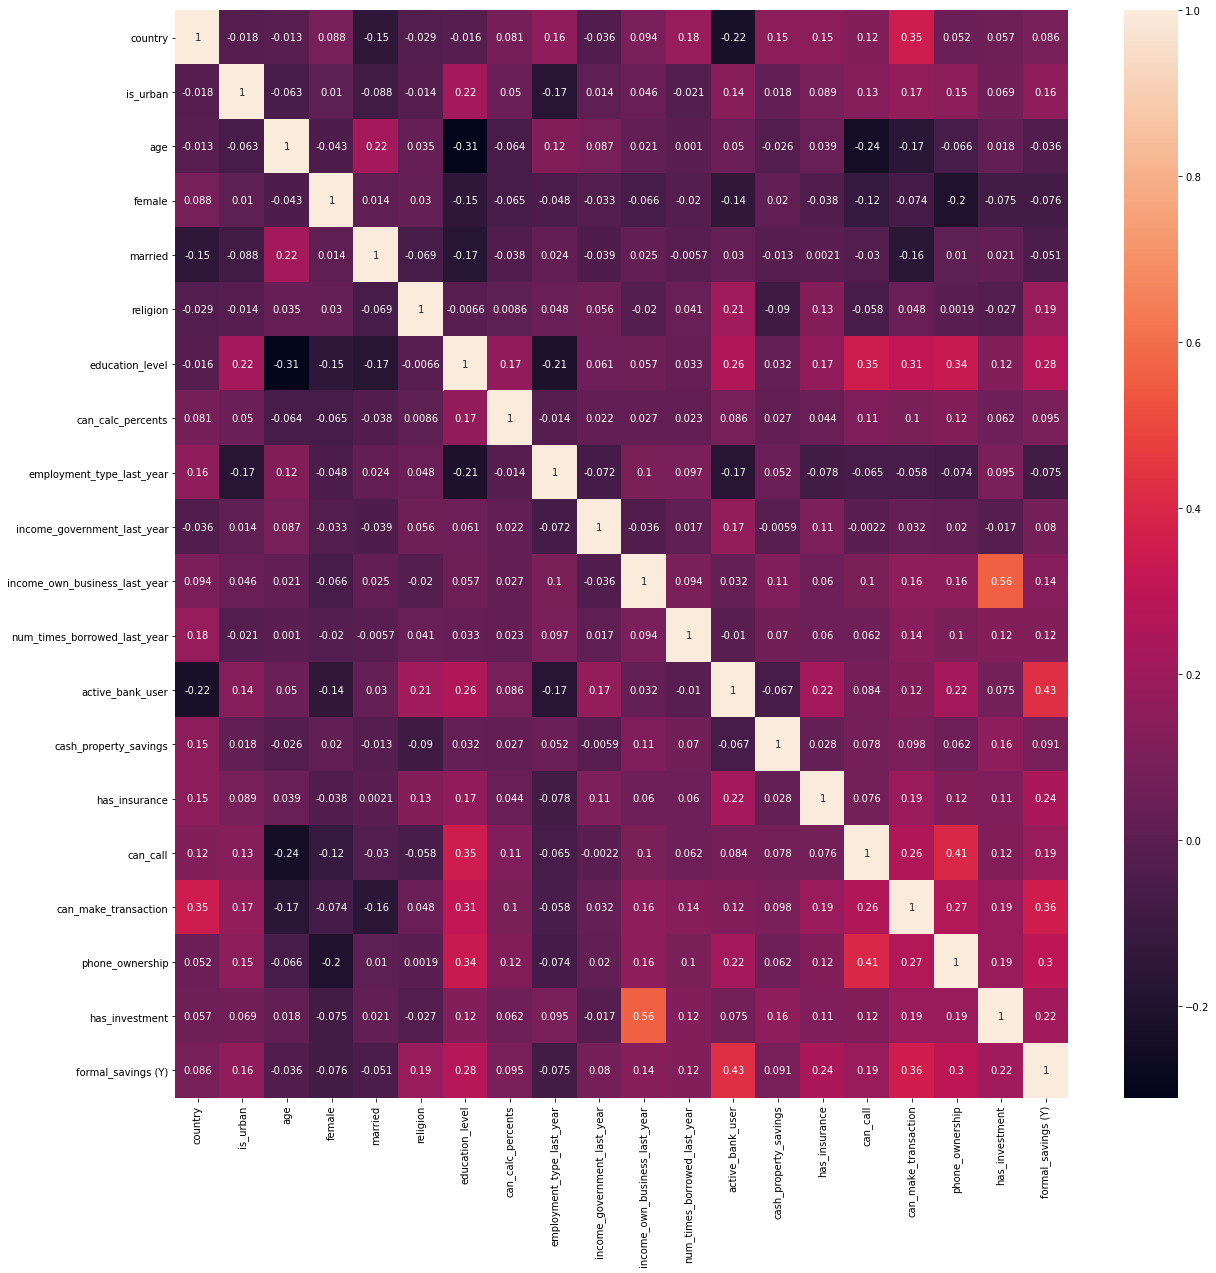

In [4]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)
plt.show()

* наибольшее влияние на зависимую переменную (country) имеет переменная can_make_transaction 

# Splitting

In [5]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, 1:]
y = df['country']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

* разделение датасета на обучающую и тестовую выборку (в процентом соотношении 80 на 20).

# Simple Linear Regression

In [6]:
# Fitting Simple Linear Regression to the Training set 
f1 = ['can_make_transaction']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

# Getting parameters
sr.coef_, sr.intercept_

(array([1.54041269]), 2.525659671722418)

* как было сказано ранее - для просто линейной регрессии будет использоваться переменная can_make_transaction. Для модели соответственно получены значения коэффициента и свободного члена. 

In [7]:
# Predicting the Test set results
y_pred = sr.predict(X_test[f1])

# Coefficient of determination R^2
sr.score(X_train[f1], y_train).round(3)

0.12

* Получено значение R^2 = 0,12. Модель слабо описано, низкое качество. 

In [8]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)
mse1

(1.88, 1.85)

Значение на обучающий выборке больше, что означает факт того, что модель не переобучена. Однако в целом качество такой модели на очень низком уровне.

# Multiple Linear Regression

In [37]:
#!pip install statsmodels

In [10]:
# Fitting Multiple Regression
mr = LinearRegression().fit(X_train, y_train)

# Coefficient of determination R^2
mr.score(X_train, y_train).round(3)

0.298

* Значение R^2 значительно увеличилось, однако все также остается на низком уровне. Модели слабо описана. Для дальнейшей работы целесообразно отобрать наиболее значимые переменные.

# Checking p-values

In [11]:
# Checking p-values
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train.astype(float), X1.astype(float)).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                country   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     149.9
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:27:25   Log-Likelihood:                -13014.
No. Observations:                6720   AIC:                         2.607e+04
Df Residuals:                    6700   BIC:                         2.620e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.8438      0.103     17.910      0.000       1.642       2.046
is_urban                         -0.1857      0.046     -4.053      0.000      -0.276      -0.096
age                               0.0081      0.002      5.380      0.000       0.005       0.011
female                            0.3899      0.043      9.063      0.000       0.306       0.474
married                          -0.5452      0.045    -12.033      0.000      -0.634      -0.456
religion                         -0.1042      0.029     -3.624      0.000      -0.161      -0.048
education_level                  -0.2186      0.028     -7.836      0.000      -0.273      -0.164
can_calc_percents                 0.2998      0.043      7.022      0.000       0.216       0.384
employment_type_last_year         0.1955      0.017     11.690      0.000       0.163       0.228
income_government_last_year      -0.1589      0.091     -1.746      0.081      -0.337       0.019
income_own_business_last_year     0.1879      0.054      3.452      0.001       0.081       0.295
num_times_borrowed_last_year      0.2469      0.023     10.790      0.000       0.202       0.292
active_bank_user                 -1.2164      0.060    -20.144      0.000      -1.335      -1.098
cash_property_savings             0.3015      0.043      6.953      0.000       0.216       0.386
has_insurance                     0.9524      0.065     14.598      0.000       0.825       1.080
can_call                          0.4145      0.056      7.429      0.000       0.305       0.524
can_make_transaction              1.4171      0.053     26.982      0.000       1.314       1.520
phone_ownership                   0.0312      0.031      0.996      0.319      -0.030       0.093
has_investment                   -0.3089      0.056     -5.553      0.000      -0.418      -0.200
formal_savings (Y)                0.2422      0.055      4.389      0.000       0.134       0.350
==============================================================================
Omnibus:                       49.519   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.879
Skew:                          -0.017   Prob(JB):                     4.40e-08
Kurtosis:                       2.654   Cond. No.                         208.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Recursive feature elimination

In [49]:
# Feature ranking with recursive feature elimination
from sklearn.feature_selection import RFE
n_features = X.shape[1]
estimator = LinearRegression()
selector = RFE(estimator,  n_features_to_select = 17)
selector = selector.fit(X, y)

# Selected Features
selected_columns=[]
for i in range(n_features):
    if selector.support_[i] == True:
        selected_columns.append(i)
        
f_lm = []
for column in selected_columns:
    f_lm.append(X.columns[column])

* По значимости P-value отобраны переменные для включения в модель (17) и продолжаем работу с множественной регрссиией на наиболее значимых переменных.

In [50]:
# Fitting Optimized Multiple Regression
mr_rfe = LinearRegression().fit(X_train[f_lm], y_train)

# Getting parameters
mr_rfe.coef_, mr_rfe.intercept_

(array([-0.17482379,  0.36301422, -0.49894952, -0.10387073, -0.25010759,
         0.29832194,  0.20076361, -0.11039433,  0.19645271,  0.24894704,
        -1.18579137,  0.30182905,  0.97872845,  0.38475984,  1.40168258,
        -0.29692002,  0.25470777]),
 2.2004991088990264)

In [47]:

# Predicting the Test set results
y_pred = mr_rfe.predict(X_test[f_lm])

# Coefficient of determination R^2
mr_rfe.score(X_train[f_lm], y_train).round(3)

0.295

In [48]:
# Mean squared error
mse2 = mean_squared_error(y_train, mr_rfe.predict(X_train[f_lm]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)
mse2

(1.68, 1.68)

In [16]:
# Feature ranking with recursive feature elimination
from sklearn.feature_selection import RFE
n_features = X.shape[1]
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 13)
selector = selector.fit(X, y)

# Selected Features
selected_columns=[]
for i in range(n_features):
    if selector.support_[i] == True:
        selected_columns.append(i)
        
f_lm1 = []
for column in selected_columns:
    f_lm1.append(X.columns[column])

In [17]:
# Fitting Optimized Multiple Regression
mr_rfe1 = LinearRegression().fit(X_train[f_lm1], y_train)

# Getting parameters
mr_rfe1.coef_, mr_rfe1.intercept_

(array([ 0.34098462, -0.47197153, -0.2583939 ,  0.29304249,  0.20689079,
         0.25036869, -1.24062987,  0.31872525,  0.94626192,  0.39480719,
         1.39941179, -0.18993525,  0.22305561]),
 2.0951056707874196)

In [18]:

# Predicting the Test set results
y_pred = mr_rfe1.predict(X_test[f_lm1])

# Coefficient of determination R^2
mr_rfe1.score(X_train[f_lm1], y_train).round(3)

0.291

In [19]:
# Mean squared error
mse3 = mean_squared_error(y_train, mr_rfe1.predict(X_train[f_lm1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)
mse3

(1.69, 1.69)

* По сравнению с простой линейной регрессией - данная модель имеет лучшие показатели. Значение R^2 на всех переменных и на наиболее значимых практически не отличается, а значение MSE уменьшилось и переобучения модели не произошло.

In [60]:

# Backward Elimination with p-values
def backwardElimination(x, y, sl):
    x = sm.add_constant(x)
    numVars = x.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y.astype(float), x.astype(float)).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = x.drop(x.columns[j], axis=1)
    regressor_OLS.summary()
    return x

SL = 0.01
X_Modeled = backwardElimination(X_train, y_train, SL)

* Отбор соответсвующих значимых переменных по критерию порогового значения (SL). Данный метод удобен для большого числа переменных, когда сложно посчитать сколько именно по критерию p-value значимых предикторов. Таким образом подобрано наиболее оптимальное пороговое значение (0.01).

In [61]:
# Fitting Optimized Multiple Regression
mr_be = LinearRegression().fit(X_Modeled, y_train)

# Coefficient of determination R^2
mr_be.score(X_Modeled, y_train).round(3)

0.298

In [ ]:
* Значение R^2 не изменилось по сравнению с моделью множественной регрессии (построенной на всех переменных).

# Polynomial Regression

In [22]:

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)

pr = LinearRegression().fit(X_train_p[:,1:], y_train)

# Getting parameters
pr.coef_, pr.intercept_

(array([-4.99431634e+01,  4.36113830e-02,  2.51667134e+09, -1.31887092e+09,
         9.63070934e-01,  6.71444777e-01,  6.81305334e+08, -1.81507887e-02,
         2.87830081e+08, -3.02611745e+08,  2.21600344e-01, -2.66956177e+08,
        -4.96847083e+08,  6.62931449e+08, -8.78123913e+08,  1.29699101e+08,
         1.77293938e-01, -7.78133702e+08, -9.09316353e+08,  4.99527424e+01,
        -3.95584106e-03, -1.10675126e-01,  1.11857951e-01, -2.49167383e-02,
         8.97598267e-03,  5.99231571e-02,  2.44525373e-02, -2.34585450e-01,
        -2.19478205e-01,  4.38898653e-02, -1.92548923e-01,  1.08773932e-02,
        -1.04240600e-01, -4.83475477e-02,  1.79339819e-01, -1.47230029e-02,
         2.10105866e-01, -7.46095404e-02, -1.09434128e-04, -1.00722462e-02,
        -1.34816542e-02, -1.66049898e-02,  1.05738640e-04, -9.46015120e-04,
         1.22895837e-03,  1.83929503e-03,  5.94681501e-03, -1.01768970e-03,
         6.48871064e-03, -6.27936423e-03,  1.11766681e-02, -9.14765894e-03,
        -6.9

*Построена модель полиномиальной регрессии. Следует отметить, что в нулевую степень переменные не были возведены (столбец единиц был исключен для большего качества).

In [23]:

# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,1:])

# Coefficient of determination R^2
pr.score(X_train_p[:,1:], y_train).round(3)

0.401

In [24]:
# Mean squared error
mse4 = mean_squared_error(y_train, pr.predict(X_train_p[:,1:]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)
mse4

(1.55, 1.59)

Значение R^2 вышло на максимальный уровень, что указывает на улучшение качества модели. Значение MSE на тестовой выборке несколько больше, чем на обучающей, однако в целом они сопастовимы. Таким образом, данная процедура дает нам наилучшую модель из полученных нами.

# RESULTS

# ! ЛИНЕЙНАЯ РЕГРЕССИЯ !

In [25]:
 sr.score(X_train[f1], y_train).round(3)

0.12

In [26]:
mse1

(1.88, 1.85)

# ! МНОЖЕСТВЕННАЯ РЕГРЕССИЯ !

In [27]:
mr.score(X_train, y_train).round(3)
#Множественная регрессия

0.298

# ! 11 переменных !

In [28]:
mr_rfe.score(X_train[f_lm], y_train).round(3)

0.288

In [29]:
mse2

(1.69, 1.69)

# ! 13 переменных !

In [30]:
mr_rfe1.score(X_train[f_lm1], y_train).round(3)
#20 переменных - множественная регрессия

0.291

In [31]:
mse3

(1.69, 1.69)

# ОТБОР P-VALUES

In [32]:
mr_be.score(X_Modeled, y_train).round(3)
#на основе отбора p-values

0.298

# ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ

In [33]:
pr.score(X_train_p[:,1:], y_train).round(3)
#Полиномиальная регрессия

0.401

In [34]:
mse4

(1.55, 1.59)

# Pickle

In [35]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

"консервация" полученных данных для дальнейшего их использования